# notebook to go from multiple tsv feature files to one tsv feature file for Despicable Me

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

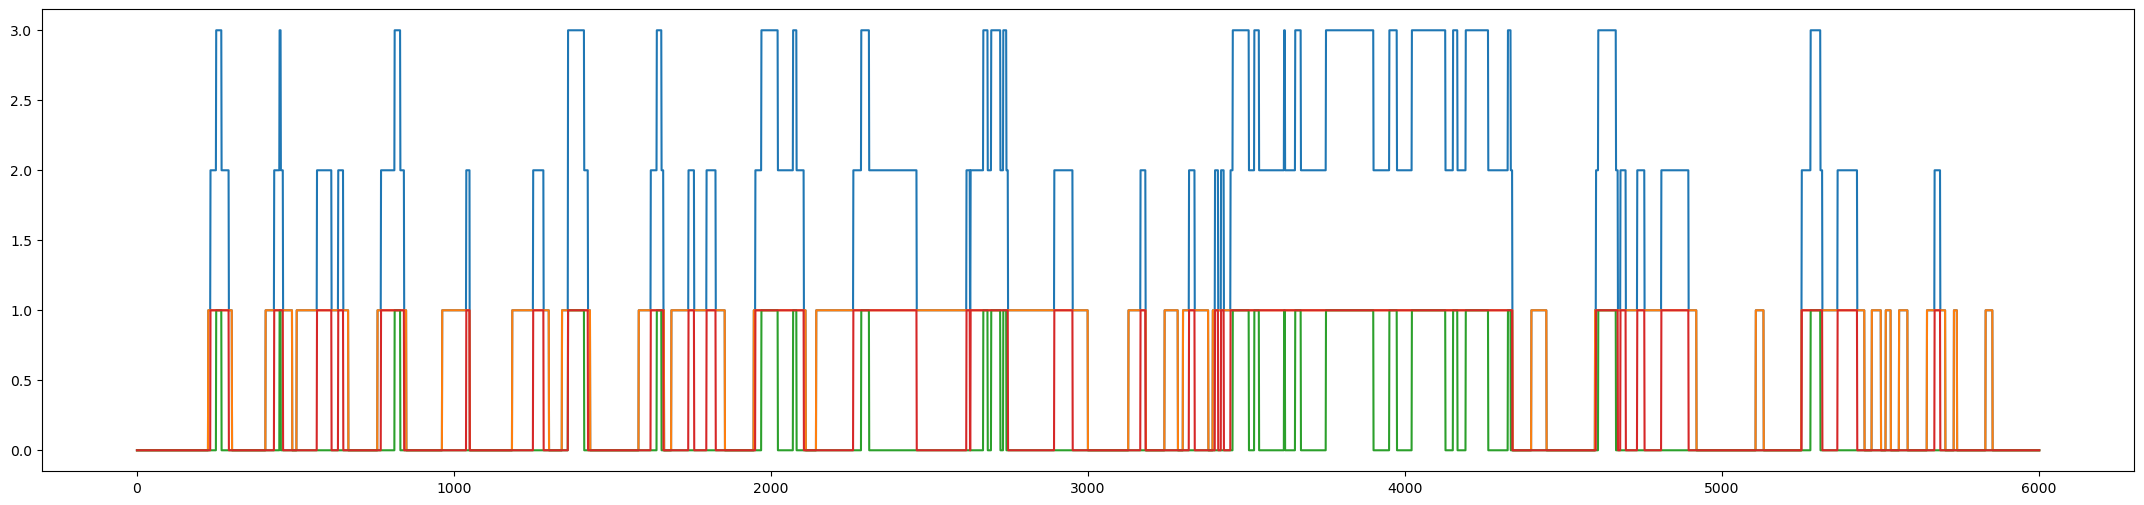

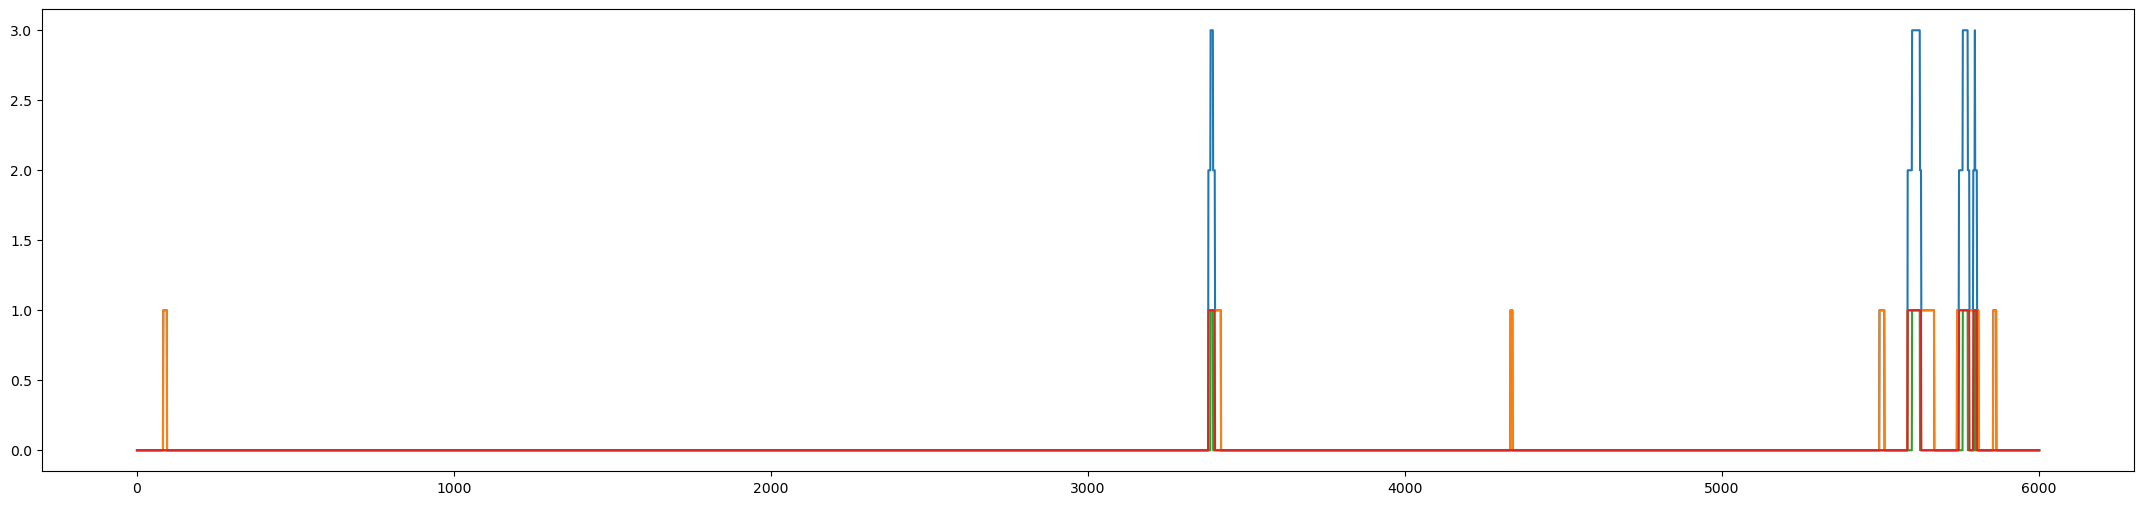

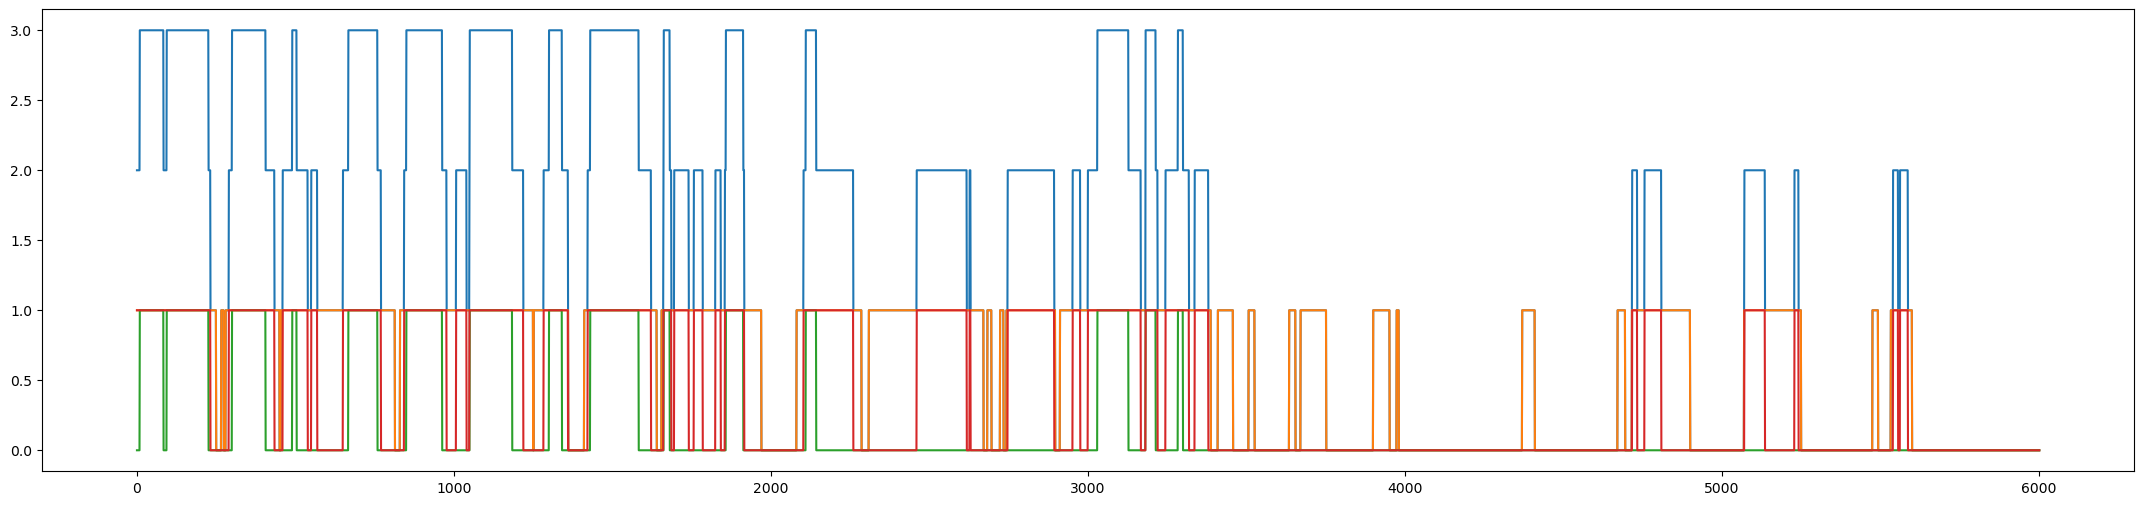

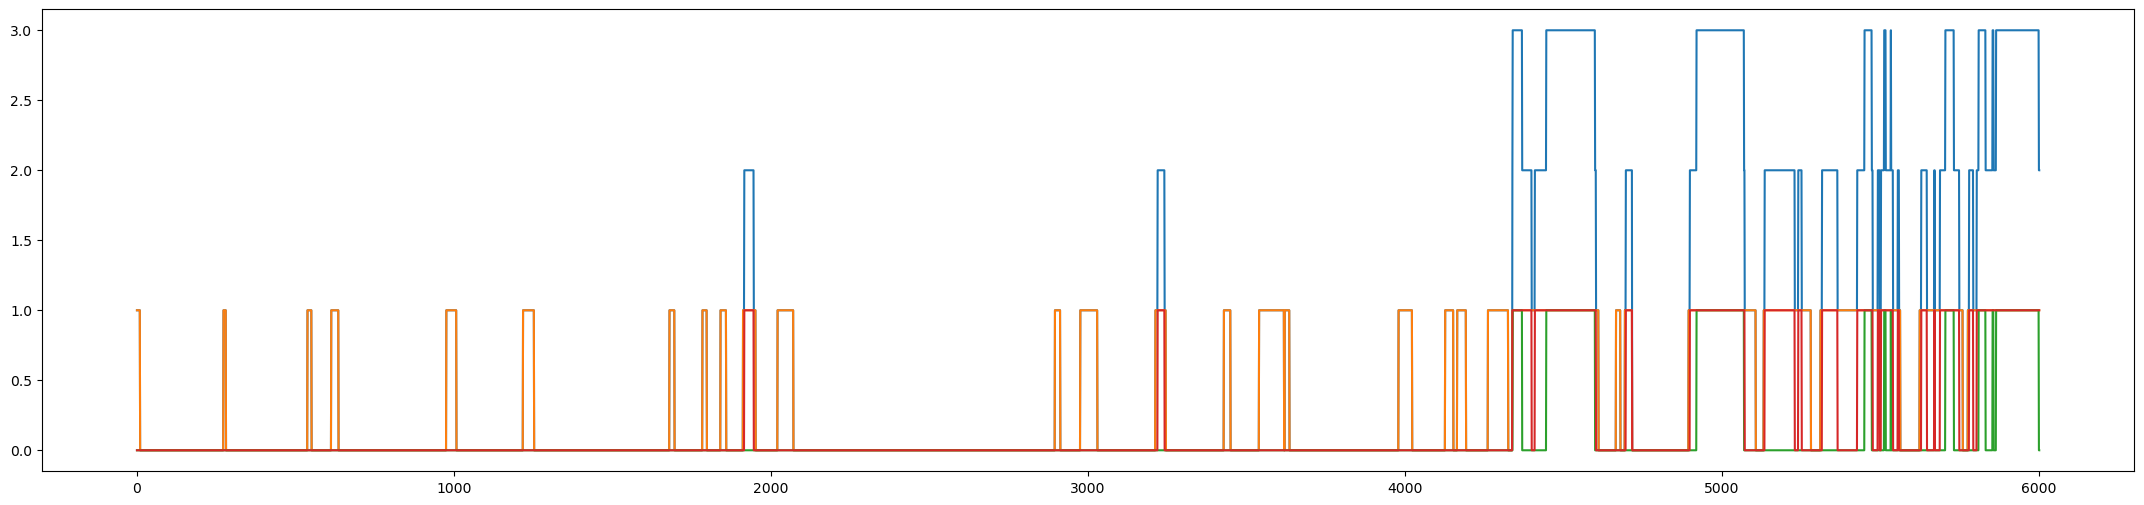

In [108]:
features= ['mental','pain','social','control']
for feature in features:

    values=[]
    lengths=[]
    for f in glob.glob(f'../sourcedata/data/HBN/features/tom/dm/*{feature}.tsv'):
        df=pd.read_csv(f, sep='\t')
        lengths.append(df.shape[0])
        values.append(df.iloc[:,2].values)

    combined=np.zeros( (3,int(max(lengths))) )

    for i,v in enumerate(values):
        for ii,vv in enumerate(v):
            combined[i,ii]=vv
    combined_sum=np.sum(combined,axis=0)

    combined_sum_lenient_any=  np.where( combined_sum > 0.5, 1, 0 ) #where anyone rated the feature

    combined_sum_stringent_all=  np.where( combined_sum > 2.5, 1, 0 ) #where everyone rated the feature

    combined_sum_half = np.where( combined_sum > 1.5, 1, 0 ) #where at least half rated the feature

    plt.figure(figsize=(27, 6))
    plt.plot(combined_sum)
    plt.plot(combined_sum_lenient_any)
    plt.plot(combined_sum_stringent_all)
    plt.plot(combined_sum_half)


    df.iloc[:,2]=combined_sum_lenient_any
    df.to_csv( f'../sourcedata/data/HBN/features/tom/dm/combined/{feature}_lenient.tsv', index=False, sep='\t' )

    df.iloc[:,2]=combined_sum_stringent_all
    df.to_csv( f'../sourcedata/data/HBN/features/tom/dm/combined/{feature}_stringent.tsv', index=False, sep='\t' )

    df.iloc[:,2]=combined_sum_half
    df.to_csv( f'../sourcedata/data/HBN/features/tom/dm/combined/{feature}_half.tsv', index=False, sep='\t' )
